In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline

In [184]:
bcostpath=r'/Users/portia_murray/Dropbox/PhD/ICAE data/Building/Sizes_Cost.csv'
building_cost_size=pd.read_csv(bcostpath)
building_cost_size.sum()

Unnamed: 0    25425.000000
GSHP              0.355856
ASHP              4.176840
Gas_boiler     1438.802479
Oil_boiler     6867.384382
PEMFC             0.000000
PEMEC             0.000000
PV             7164.963255
ST                0.000000
Bat               0.000000
TES           13683.972063
H2S               0.000000
Comp              0.000000
Bio_boiler        0.000000
dtype: float64

In [185]:
Levels=['Building','Neighbourhood','Community','District','Village']
Obj=['1','2','3','4','5']
Tech=['GSHP','ASHP','Gas_boiler','Oil_boiler','PEMFC','PEMEC','PV','ST','Bat','TES','H2S','Comp','Bio_boiler']
Sizing=pd.DataFrame(index=Obj,columns=Tech)

In [186]:
bcostpath=r'/Users/portia_murray/Dropbox/PhD/ICAE data/Building/Sizes_Cost.csv'
building_cost_size=pd.read_csv(bcostpath)
for t in range(0,len(Tech)):
    Sizing.loc['1',Tech[t]]=building_cost_size[Tech[t]].sum()
Sizing

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0.355856,4.17684,1438.8,6867.38,0,0,7164.96,0,0,13684,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
Node='Node25'
case='Building/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
Node25SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
Node25SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
Node25SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
Node25SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
Node25SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
Node25SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
Node25SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
Node25SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
Node25SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
Node25SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
Node25SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
Node25SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)
Node25SizeHP

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0.231723,0.000000,0.000000,0.766293,0.2043,1.884758,0.000000,0.00,0.000000,0.331097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.412411,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.280529,3.106394,0.000000,0.0000,0.000000,5.403319,0.35,10.717435,0.000000,...,7.546838,7.012861,21.605675,7.069342,9.273338,0.000000,2.958336,3.176189,10.238494,2.387849


In [188]:
Sizing.loc['2','GSHP']=Node25SizeHP.iloc[0].sum()
Sizing.loc['2','ASHP']=Node25SizeHP.iloc[1].sum()
Sizing.loc['2','Gas_boiler']=Node25SizeBoiler.iloc[0].sum()
Sizing.loc['2','Oil_boiler']=Node25SizeBoiler.iloc[1].sum()
Sizing.loc['2','Bio_boiler']=Node25SizeBoiler.iloc[2].sum()
Sizing.loc['2','PEMFC']=Node25SizeCHP.iloc[0].sum()
Sizing.loc['2','PEMEC']=Node25SizeCHP.iloc[1].sum()
Sizing.loc['2','PV']=Node25SizeR.iloc[0].sum()
Sizing.loc['2','ST']=Node25SizeR.iloc[1].sum()
Sizing.loc['2','Bat']=Node25SizeStor.iloc[0].sum()
Sizing.loc['2','TES']=Node25SizeStor.iloc[1].sum()
Sizing.loc['2','H2S']=Node25SizeStor.iloc[2].sum()
Sizing.loc['2','Comp']=Node25SizeComp['SizeComp'].sum()
Sizing

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0.355856,4.17684,1438.8,6867.38,0,0,7164.96,0,0,13684,0,0,0
2,71.5547,676.113,906.828,4999.57,0,0,7994.3,0,0,21720.9,0,-1.75178e-11,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
Node='Node50new'
case='Building/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
Node50SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
Node50SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
Node50SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
Node50SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
Node50SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
Node50SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
Node50SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
Node50SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
Node50SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
Node50SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
Node50SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
Node50SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [190]:
nde='3'
Sizing.loc[nde,'GSHP']=Node50SizeHP.iloc[0].sum()
Sizing.loc[nde,'ASHP']=Node50SizeHP.iloc[1].sum()
Sizing.loc[nde,'Gas_boiler']=Node50SizeBoiler.iloc[0].sum()
Sizing.loc[nde,'Oil_boiler']=Node50SizeBoiler.iloc[1].sum()
Sizing.loc[nde,'Bio_boiler']=Node50SizeBoiler.iloc[2].sum()
Sizing.loc[nde,'PEMFC']=Node50SizeCHP.iloc[0].sum()
Sizing.loc[nde,'PEMEC']=Node50SizeCHP.iloc[1].sum()
Sizing.loc[nde,'PV']=Node50SizeR.iloc[0].sum()
Sizing.loc[nde,'ST']=Node50SizeR.iloc[1].sum()
Sizing.loc[nde,'Bat']=Node50SizeStor.iloc[0].sum()
Sizing.loc[nde,'TES']=Node50SizeStor.iloc[1].sum()
Sizing.loc[nde,'H2S']=Node50SizeStor.iloc[2].sum()
Sizing.loc[nde,'Comp']=Node50SizeComp['SizeComp'].sum()
Sizing

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0.355856,4.17684,1438.8,6867.38,0,0,7164.96,0,0,13684,0,0,0
2,71.5547,676.113,906.828,4999.57,0,0,7994.3,0,0,21720.9,0,-1.75178e-11,0
3,2504,1948.77,1269.88,3754.86,0,0,8118.7,65,0,21232.1,0,1.1307e-12,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
Node50SizeCHP

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
Node='Node75'
case='Building/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
Node75SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
Node75SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
Node75SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
Node75SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
Node75SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
Node75SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
Node75SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
Node75SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
Node75SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
Node75SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
Node75SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
Node75SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [193]:
Sizing.loc['4','GSHP']=Node75SizeHP.iloc[0].sum()
Sizing.loc['4','ASHP']=Node75SizeHP.iloc[1].sum()
Sizing.loc['4','Gas_boiler']=Node75SizeBoiler.iloc[0].sum()
Sizing.loc['4','Oil_boiler']=Node75SizeBoiler.iloc[1].sum()
Sizing.loc['4','Bio_boiler']=Node75SizeBoiler.iloc[2].sum()
Sizing.loc['4','PEMFC']=Node75SizeCHP.iloc[0].sum()
Sizing.loc['4','PEMEC']=Node75SizeCHP.iloc[1].sum()
Sizing.loc['4','PV']=Node75SizeR.iloc[0].sum()
Sizing.loc['4','ST']=Node75SizeR.iloc[1].sum()
Sizing.loc['4','Bat']=Node75SizeStor.iloc[0].sum()
Sizing.loc['4','TES']=Node75SizeStor.iloc[1].sum()
Sizing.loc['4','H2S']=Node75SizeStor.iloc[2].sum()
Sizing.loc['4','Comp']=Node75SizeComp['SizeComp'].sum()
Sizing

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0.355856,4.17684,1438.8,6867.38,0,0,7164.96,0,0,13684,0,0,0
2,71.5547,676.113,906.828,4999.57,0,0,7994.3,0,0,21720.9,0,-1.75178e-11,0
3,2504,1948.77,1269.88,3754.86,0,0,8118.7,65,0,21232.1,0,1.1307e-12,0
4,1255,2553.53,2478.3,1432.12,0,0,7723.13,0,12.1005,21380,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
Node='Node99'
case='Building/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
Node99SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
Node99SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
Node99SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
Node99SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
Node99SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
Node99SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
Node99SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
Node99SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
Node99SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
Node99SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
Node99SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
Node99SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [195]:
Sizing.loc['5','GSHP']=Node99SizeHP.iloc[0].sum()
Sizing.loc['5','ASHP']=Node99SizeHP.iloc[1].sum()
Sizing.loc['5','Gas_boiler']=Node99SizeBoiler.iloc[0].sum()
Sizing.loc['5','Oil_boiler']=Node99SizeBoiler.iloc[1].sum()
Sizing.loc['5','Bio_boiler']=Node99SizeBoiler.iloc[2].sum()
Sizing.loc['5','PEMFC']=Node99SizeCHP.iloc[0].sum()
Sizing.loc['5','PEMEC']=Node99SizeCHP.iloc[1].sum()
Sizing.loc['5','PV']=Node99SizeR.iloc[0].sum()
Sizing.loc['5','ST']=Node99SizeR.iloc[1].sum()
Sizing.loc['5','Bat']=Node99SizeStor.iloc[0].sum()
Sizing.loc['5','TES']=Node99SizeStor.iloc[1].sum()
Sizing.loc['5','H2S']=Node99SizeStor.iloc[2].sum()
Sizing.loc['5','Comp']=Node99SizeComp['SizeComp'].sum()
Sizing

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0.355856,4.17684,1438.8,6867.38,0,0,7164.96,0,0,13684,0,0,0
2,71.5547,676.113,906.828,4999.57,0,0,7994.3,0,0,21720.9,0,-1.75178e-11,0
3,2504,1948.77,1269.88,3754.86,0,0,8118.7,65,0,21232.1,0,1.1307e-12,0
4,1255,2553.53,2478.3,1432.12,0,0,7723.13,0,12.1005,21380,0,0,0
5,44.8152,7772.83,126.265,0.0284,112.346,119.112,20423.3,-5.85e-11,943.079,73529,8864.48,0.384444,0


In [196]:
Sizing

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0.355856,4.17684,1438.8,6867.38,0,0,7164.96,0,0,13684,0,0,0
2,71.5547,676.113,906.828,4999.57,0,0,7994.3,0,0,21720.9,0,-1.75178e-11,0
3,2504,1948.77,1269.88,3754.86,0,0,8118.7,65,0,21232.1,0,1.1307e-12,0
4,1255,2553.53,2478.3,1432.12,0,0,7723.13,0,12.1005,21380,0,0,0
5,44.8152,7772.83,126.265,0.0284,112.346,119.112,20423.3,-5.85e-11,943.079,73529,8864.48,0.384444,0


In [197]:
SizingNeigh=pd.DataFrame(index=Obj,columns=Tech)

In [198]:
Node='NNode25'
case='Neigh/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NNode25SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
NNode25SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
NNode25SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
NNode25SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
NNode25SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
NNode25SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
NNode25SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeHP

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
1,38.0,42.0,45.0,36.0,46.0,61.0,40.0,39.0,46.0,32.0,42.0,42.0,25.0,27.0,31.0,22.0,43.0,38.0


In [199]:
Node='NCost'
case='Neigh/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NCostSizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
NCostSizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
NCostSizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
NCostSizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
NCostSizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
NCostSizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
NCostSizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeHP

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [200]:
Node='NNode50'
case='Neigh/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NNode50SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
NNode50SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode50SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
NNode50SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode50SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
NNode50SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode50SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
NNode50SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode50SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
NNode50SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode50SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
NNode50SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [201]:
Node='NNode75'
case='Neigh/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NNode75SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
NNode75SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode75SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
NNode75SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode75SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
NNode75SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode75SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
NNode75SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode75SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
NNode75SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode75SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
NNode75SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [202]:
SizingNeigh.loc['4','GSHP']=NNode75SizeHP.iloc[0].sum()
SizingNeigh.loc['4','ASHP']=NNode75SizeHP.iloc[1].sum()
SizingNeigh.loc['4','Gas_boiler']=NNode75SizeBoiler.iloc[0].sum()
SizingNeigh.loc['4','Oil_boiler']=NNode75SizeBoiler.iloc[1].sum()
SizingNeigh.loc['4','Bio_boiler']=NNode75SizeBoiler.iloc[2].sum()
SizingNeigh.loc['4','PEMFC']=NNode75SizeCHP.iloc[0].sum()
SizingNeigh.loc['4','PEMEC']=NNode75SizeCHP.iloc[1].sum()
SizingNeigh.loc['4','PV']=NNode75SizeR.iloc[0].sum()
SizingNeigh.loc['4','ST']=NNode75SizeR.iloc[1].sum()
SizingNeigh.loc['4','Bat']=NNode75SizeStor.iloc[0].sum()
SizingNeigh.loc['4','TES']=NNode75SizeStor.iloc[1].sum()
SizingNeigh.loc['4','H2S']=NNode75SizeStor.iloc[2].sum()
SizingNeigh.loc['4','Comp']=NNode75SizeComp['SizeComp'].sum()

In [203]:
SizingNeigh.loc['3','GSHP']=NNode50SizeHP.iloc[0].sum()
SizingNeigh.loc['3','ASHP']=NNode50SizeHP.iloc[1].sum()
SizingNeigh.loc['3','Gas_boiler']=NNode50SizeBoiler.iloc[0].sum()
SizingNeigh.loc['3','Oil_boiler']=NNode50SizeBoiler.iloc[1].sum()
SizingNeigh.loc['3','Bio_boiler']=NNode50SizeBoiler.iloc[2].sum()
SizingNeigh.loc['3','PEMFC']=NNode50SizeCHP.iloc[0].sum()
SizingNeigh.loc['3','PEMEC']=NNode50SizeCHP.iloc[1].sum()
SizingNeigh.loc['3','PV']=NNode50SizeR.iloc[0].sum()
SizingNeigh.loc['3','ST']=NNode50SizeR.iloc[1].sum()
SizingNeigh.loc['3','Bat']=NNode50SizeStor.iloc[0].sum()
SizingNeigh.loc['3','TES']=NNode50SizeStor.iloc[1].sum()
SizingNeigh.loc['3','H2S']=NNode50SizeStor.iloc[2].sum()
SizingNeigh.loc['3','Comp']=NNode50SizeComp['SizeComp'].sum()

In [204]:
Node='NNode995'
case='Neigh/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NNode99SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
NNode99SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode99SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
NNode99SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode99SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
NNode99SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode99SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
NNode99SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode99SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
NNode99SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode99SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [205]:
SizingNeigh.loc['5','GSHP']=NNode99SizeHP.iloc[0].sum()
SizingNeigh.loc['5','ASHP']=NNode99SizeHP.iloc[1].sum()
SizingNeigh.loc['5','Gas_boiler']=NNode99SizeBoiler.iloc[0].sum()
SizingNeigh.loc['5','Oil_boiler']=NNode99SizeBoiler.iloc[1].sum()
SizingNeigh.loc['5','Bio_boiler']=NNode99SizeBoiler.iloc[2].sum()
SizingNeigh.loc['5','PEMFC']=NNode99SizeCHP.iloc[0].sum()
SizingNeigh.loc['5','PEMEC']=NNode99SizeCHP.iloc[1].sum()
SizingNeigh.loc['5','PV']=NNode99SizeR.iloc[0].sum()
SizingNeigh.loc['5','ST']=NNode99SizeR.iloc[1].sum()
SizingNeigh.loc['5','Bat']=NNode99SizeStor.iloc[0].sum()
SizingNeigh.loc['5','TES']=NNode99SizeStor.iloc[1].sum()
SizingNeigh.loc['5','H2S']=NNode99SizeStor.iloc[2].sum()
SizingNeigh.loc['5','Comp']=NNode99SizeComp['SizeComp'].sum()
SizingNeigh

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68,1385,185,4593,0,0,11906,0,0,20085,0,0,0
4,0,2522,160,3552,0,0,11906,0,0,19771,0,0,0
5,0,5943,123,298,0,0,19317,10,46,45276,2,0,0


In [206]:
Node='NNode25'
case='Neigh/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NNode25SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
NNode25SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
NNode25SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
NNode25SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
NNode25SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
NNode25SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
NNode25SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [207]:
SizingNeigh.loc['2','GSHP']=NNode25SizeHP.iloc[0].sum()
SizingNeigh.loc['2','ASHP']=NNode25SizeHP.iloc[1].sum()
SizingNeigh.loc['2','Gas_boiler']=NNode25SizeBoiler.iloc[0].sum()
SizingNeigh.loc['2','Oil_boiler']=NNode25SizeBoiler.iloc[1].sum()
SizingNeigh.loc['2','Bio_boiler']=NNode25SizeBoiler.iloc[2].sum()
SizingNeigh.loc['2','PEMFC']=NNode25SizeCHP.iloc[0].sum()
SizingNeigh.loc['2','PEMEC']=NNode25SizeCHP.iloc[1].sum()
SizingNeigh.loc['2','PV']=NNode25SizeR.iloc[0].sum()
SizingNeigh.loc['2','ST']=NNode25SizeR.iloc[1].sum()
SizingNeigh.loc['2','Bat']=NNode25SizeStor.iloc[0].sum()
SizingNeigh.loc['2','TES']=NNode25SizeStor.iloc[1].sum()
SizingNeigh.loc['2','H2S']=NNode25SizeStor.iloc[2].sum()
SizingNeigh.loc['2','Comp']=NNode25SizeComp['SizeComp'].sum()

In [208]:
Node='NCost'
case='Neigh/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NCostSizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
NCostSizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
NCostSizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
NCostSizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
NCostSizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
NCostSizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
NCostSizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [209]:
nde='1'
SizingNeigh.loc[nde,'GSHP']=NCostSizeHP.iloc[0].sum()
SizingNeigh.loc[nde,'ASHP']=NCostSizeHP.iloc[1].sum()
SizingNeigh.loc[nde,'Gas_boiler']=NCostSizeBoiler.iloc[0].sum()
SizingNeigh.loc[nde,'Oil_boiler']=NCostSizeBoiler.iloc[1].sum()
SizingNeigh.loc[nde,'Bio_boiler']=NCostSizeBoiler.iloc[2].sum()
SizingNeigh.loc[nde,'PEMFC']=NCostSizeCHP.iloc[0].sum()
SizingNeigh.loc[nde,'PEMEC']=NCostSizeCHP.iloc[1].sum()
SizingNeigh.loc[nde,'PV']=NCostSizeR.iloc[0].sum()
SizingNeigh.loc[nde,'ST']=NCostSizeR.iloc[1].sum()
SizingNeigh.loc[nde,'Bat']=NCostSizeStor.iloc[0].sum()
SizingNeigh.loc[nde,'TES']=NCostSizeStor.iloc[1].sum()
SizingNeigh.loc[nde,'H2S']=NCostSizeStor.iloc[2].sum()
SizingNeigh.loc[nde,'Comp']=NCostSizeComp['SizeComp'].sum()
SizingNeigh

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,2,0,6175,0,0,10657,0,0,20579,2,0,0
2,0,695,0,5665,0,0,11897,0,0,19836,2,0,0
3,68,1385,185,4593,0,0,11906,0,0,20085,0,0,0
4,0,2522,160,3552,0,0,11906,0,0,19771,0,0,0
5,0,5943,123,298,0,0,19317,10,46,45276,2,0,0


In [210]:
NNode99SizeStor

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4122.0,2101.0,2031.0,1480.0,1712.0,4094.0,3068.0,1592.0,2057.0,2929.0,2989.0,1691.0,2881.0,3183.0,2732.0,3051.0,1670.0,1892.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
nde='5'
SizingNeigh.loc[nde,'GSHP']=NNode99SizeHP.iloc[0].sum()
SizingNeigh.loc[nde,'ASHP']=NNode99SizeHP.iloc[1].sum()
SizingNeigh.loc[nde,'Gas_boiler']=NNode99SizeBoiler.iloc[0].sum()
SizingNeigh.loc[nde,'Oil_boiler']=NNode99SizeBoiler.iloc[1].sum()
SizingNeigh.loc[nde,'Bio_boiler']=NNode99SizeBoiler.iloc[2].sum()
SizingNeigh.loc[nde,'PEMFC']=NNode99SizeCHP.iloc[0].sum()
SizingNeigh.loc[nde,'PEMEC']=NNode99SizeCHP.iloc[1].sum()
SizingNeigh.loc[nde,'PV']=NNode99SizeR.iloc[0].sum()
SizingNeigh.loc[nde,'ST']=NNode99SizeR.iloc[1].sum()
SizingNeigh.loc[nde,'Bat']=NNode99SizeStor.iloc[0].sum()
SizingNeigh.loc[nde,'TES']=NNode99SizeStor.iloc[1].sum()
SizingNeigh.loc[nde,'H2S']=NNode99SizeStor.iloc[2].sum()
SizingNeigh.loc[nde,'Comp']=NNode99SizeComp['SizeComp'].sum()
SizingNeigh

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,2,0,6175,0,0,10657,0,0,20579,2,0,0
2,0,695,0,5665,0,0,11897,0,0,19836,2,0,0
3,68,1385,185,4593,0,0,11906,0,0,20085,0,0,0
4,0,2522,160,3552,0,0,11906,0,0,19771,0,0,0
5,0,5943,123,298,0,0,19317,10,46,45276,2,0,0


In [212]:
SizingCom=pd.DataFrame(index=Obj,columns=Tech)

In [213]:
Node='CNode995'
case='Community/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
CNode99SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
CNode99SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode99SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
CNode99SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode99SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
CNode99SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode99SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
CNode99SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode99SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
CNode99SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode99SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [214]:
Node='CNode75'
case='Community/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
CNode75SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
CNode75SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode75SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
CNode75SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode75SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
CNode75SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode75SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
CNode75SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode75SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
CNode75SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode75SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
CNode75SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [215]:
Node='CNode50'
case='Community/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
CNode50SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
CNode50SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode50SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
CNode50SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode50SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
CNode50SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode50SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
CNode50SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode50SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
CNode50SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode50SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
CNode50SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [216]:
Node='CNode25'
case='Community/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
CNode25SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
CNode25SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode25SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
CNode25SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode25SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
CNode25SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode25SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
CNode25SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode25SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
CNode25SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
CNode25SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
CNode25SizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [217]:
Node='CCost'
case='Community/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
CCostSizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
CCostSizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CCostSizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
CCostSizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
CCostSizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
CCostSizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
CCostSizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
CCostSizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
CCostSizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
CCostSizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
CCostSizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')
CCostSizeStor.drop(['Unnamed: 0'], axis=1,inplace=True)

In [218]:
nde='5'
SizingCom.loc[nde,'GSHP']=CNode99SizeHP.iloc[0].sum()
SizingCom.loc[nde,'ASHP']=CNode99SizeHP.iloc[1].sum()
SizingCom.loc[nde,'Gas_boiler']=CNode99SizeBoiler.iloc[0].sum()
SizingCom.loc[nde,'Oil_boiler']=CNode99SizeBoiler.iloc[1].sum()
SizingCom.loc[nde,'Bio_boiler']=CNode99SizeBoiler.iloc[2].sum()
SizingCom.loc[nde,'PEMFC']=CNode99SizeCHP.iloc[0].sum()
SizingCom.loc[nde,'PEMEC']=CNode99SizeCHP.iloc[1].sum()
SizingCom.loc[nde,'PV']=CNode99SizeR.iloc[0].sum()
SizingCom.loc[nde,'ST']=CNode99SizeR.iloc[1].sum()
SizingCom.loc[nde,'Bat']=CNode99SizeStor.iloc[0].sum()
SizingCom.loc[nde,'TES']=CNode99SizeStor.iloc[1].sum()
SizingCom.loc[nde,'H2S']=CNode99SizeStor.iloc[2].sum()
SizingCom.loc[nde,'Comp']=CNode99SizeComp['SizeComp'].sum()

In [219]:
nde='4'
SizingCom.loc[nde,'GSHP']=CNode75SizeHP.iloc[0].sum()
SizingCom.loc[nde,'ASHP']=CNode75SizeHP.iloc[1].sum()
SizingCom.loc[nde,'Gas_boiler']=CNode75SizeBoiler.iloc[0].sum()
SizingCom.loc[nde,'Oil_boiler']=CNode75SizeBoiler.iloc[1].sum()
SizingCom.loc[nde,'Bio_boiler']=CNode75SizeBoiler.iloc[2].sum()
SizingCom.loc[nde,'PEMFC']=CNode75SizeCHP.iloc[0].sum()
SizingCom.loc[nde,'PEMEC']=CNode75SizeCHP.iloc[1].sum()
SizingCom.loc[nde,'PV']=CNode75SizeR.iloc[0].sum()
SizingCom.loc[nde,'ST']=CNode75SizeR.iloc[1].sum()
SizingCom.loc[nde,'Bat']=CNode75SizeStor.iloc[0].sum()
SizingCom.loc[nde,'TES']=CNode75SizeStor.iloc[1].sum()
SizingCom.loc[nde,'H2S']=CNode75SizeStor.iloc[2].sum()
SizingCom.loc[nde,'Comp']=CNode75SizeComp['SizeComp'].sum()

In [220]:
nde='3'
SizingCom.loc[nde,'GSHP']=CNode50SizeHP.iloc[0].sum()
SizingCom.loc[nde,'ASHP']=CNode50SizeHP.iloc[1].sum()
SizingCom.loc[nde,'Gas_boiler']=CNode50SizeBoiler.iloc[0].sum()
SizingCom.loc[nde,'Oil_boiler']=CNode50SizeBoiler.iloc[1].sum()
SizingCom.loc[nde,'Bio_boiler']=CNode50SizeBoiler.iloc[2].sum()
SizingCom.loc[nde,'PEMFC']=CNode50SizeCHP.iloc[0].sum()
SizingCom.loc[nde,'PEMEC']=CNode50SizeCHP.iloc[1].sum()
SizingCom.loc[nde,'PV']=CNode50SizeR.iloc[0].sum()
SizingCom.loc[nde,'ST']=CNode50SizeR.iloc[1].sum()
SizingCom.loc[nde,'Bat']=CNode50SizeStor.iloc[0].sum()
SizingCom.loc[nde,'TES']=CNode50SizeStor.iloc[1].sum()
SizingCom.loc[nde,'H2S']=CNode50SizeStor.iloc[2].sum()
SizingCom.loc[nde,'Comp']=CNode50SizeComp['SizeComp'].sum()

In [221]:
nde='2'
SizingCom.loc[nde,'GSHP']=CNode25SizeHP.iloc[0].sum()
SizingCom.loc[nde,'ASHP']=CNode25SizeHP.iloc[1].sum()
SizingCom.loc[nde,'Gas_boiler']=CNode25SizeBoiler.iloc[0].sum()
SizingCom.loc[nde,'Oil_boiler']=CNode25SizeBoiler.iloc[1].sum()
SizingCom.loc[nde,'Bio_boiler']=CNode25SizeBoiler.iloc[2].sum()
SizingCom.loc[nde,'PEMFC']=CNode25SizeCHP.iloc[0].sum()
SizingCom.loc[nde,'PEMEC']=CNode25SizeCHP.iloc[1].sum()
SizingCom.loc[nde,'PV']=CNode25SizeR.iloc[0].sum()
SizingCom.loc[nde,'ST']=CNode25SizeR.iloc[1].sum()
SizingCom.loc[nde,'Bat']=CNode25SizeStor.iloc[0].sum()
SizingCom.loc[nde,'TES']=CNode25SizeStor.iloc[1].sum()
SizingCom.loc[nde,'H2S']=CNode25SizeStor.iloc[2].sum()
SizingCom.loc[nde,'Comp']=CNode25SizeComp['SizeComp'].sum()

In [222]:
nde='1'
SizingCom.loc[nde,'GSHP']=CCostSizeHP.iloc[0].sum()
SizingCom.loc[nde,'ASHP']=CCostSizeHP.iloc[1].sum()
SizingCom.loc[nde,'Gas_boiler']=CCostSizeBoiler.iloc[0].sum()
SizingCom.loc[nde,'Oil_boiler']=CCostSizeBoiler.iloc[1].sum()
SizingCom.loc[nde,'Bio_boiler']=CCostSizeBoiler.iloc[2].sum()
SizingCom.loc[nde,'PEMFC']=CCostSizeCHP.iloc[0].sum()
SizingCom.loc[nde,'PEMEC']=CCostSizeCHP.iloc[1].sum()
SizingCom.loc[nde,'PV']=CCostSizeR.iloc[0].sum()
SizingCom.loc[nde,'ST']=CCostSizeR.iloc[1].sum()
SizingCom.loc[nde,'Bat']=CCostSizeStor.iloc[0].sum()
SizingCom.loc[nde,'TES']=CCostSizeStor.iloc[1].sum()
SizingCom.loc[nde,'H2S']=CCostSizeStor.iloc[2].sum()
SizingCom.loc[nde,'Comp']=CCostSizeComp['SizeComp'].sum()
SizingCom

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,3,0,6160,0,0,11656,0,0,21200,0,0,0
2,0,652,0,6185,0,0,11656,0,0,17754,0,0,0
3,0,1361,0,4895,0,0,11656,0,0,19837,0,0,0
4,0,2249,0,4042,0,0,14661,0,0,19252,0,0,0
5,0,3000,4067,0,0,0,7862,11369,0,62516,2,0,0


In [223]:
SizingNeigh

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,2,0,6175,0,0,10657,0,0,20579,2,0,0
2,0,695,0,5665,0,0,11897,0,0,19836,2,0,0
3,68,1385,185,4593,0,0,11906,0,0,20085,0,0,0
4,0,2522,160,3552,0,0,11906,0,0,19771,0,0,0
5,0,5943,123,298,0,0,19317,10,46,45276,2,0,0


In [224]:
SizingDistrict=pd.DataFrame(index=Obj,columns=Tech)

In [225]:
Node='DNode995'
case='District/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
DNode99SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
DNode99SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode99SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
DNode99SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode99SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
DNode99SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode99SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
DNode99SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode99SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
DNode99SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode99SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [226]:
Node='DNode75'
case='District/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
DNode75SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
DNode75SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode75SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
DNode75SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode75SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
DNode75SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode75SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
DNode75SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode75SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
DNode75SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode75SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [227]:
Node='DNode50'
case='District/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
DNode50SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
DNode50SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode50SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
DNode50SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode50SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
DNode50SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode50SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
DNode50SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode50SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
DNode50SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode50SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [228]:
Node='DNode25'
case='District/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
DNode25SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
DNode25SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode25SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
DNode25SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode25SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
DNode25SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode25SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
DNode25SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode25SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
DNode25SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
DNode25SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [229]:
Node='DCost'
case='District/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
DCostSizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
DCostSizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DCostSizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
DCostSizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
DCostSizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
DCostSizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
DCostSizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
DCostSizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
DCostSizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
DCostSizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
DCostSizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [230]:
nde='1'
SizingDistrict.loc[nde,'GSHP']=DCostSizeHP.iloc[0].sum()
SizingDistrict.loc[nde,'ASHP']=DCostSizeHP.iloc[1].sum()
SizingDistrict.loc[nde,'Gas_boiler']=DCostSizeBoiler.iloc[0].sum()
SizingDistrict.loc[nde,'Oil_boiler']=DCostSizeBoiler.iloc[1].sum()
SizingDistrict.loc[nde,'Bio_boiler']=DCostSizeBoiler.iloc[2].sum()
SizingDistrict.loc[nde,'PEMFC']=DCostSizeCHP.iloc[0].sum()
SizingDistrict.loc[nde,'PEMEC']=DCostSizeCHP.iloc[1].sum()
SizingDistrict.loc[nde,'PV']=DCostSizeR.iloc[0].sum()
SizingDistrict.loc[nde,'ST']=DCostSizeR.iloc[1].sum()
SizingDistrict.loc[nde,'Bat']=DCostSizeStor.iloc[0].sum()
SizingDistrict.loc[nde,'TES']=DCostSizeStor.iloc[1].sum()
SizingDistrict.loc[nde,'H2S']=DCostSizeStor.iloc[2].sum()
SizingDistrict.loc[nde,'Comp']=DCostSizeComp['SizeComp'].sum()

In [231]:
nde='5'
SizingDistrict.loc[nde,'GSHP']=DNode99SizeHP.iloc[0].sum()
SizingDistrict.loc[nde,'ASHP']=DNode99SizeHP.iloc[1].sum()
SizingDistrict.loc[nde,'Gas_boiler']=DNode99SizeBoiler.iloc[0].sum()
SizingDistrict.loc[nde,'Oil_boiler']=DNode99SizeBoiler.iloc[1].sum()
SizingDistrict.loc[nde,'Bio_boiler']=DNode99SizeBoiler.iloc[2].sum()
SizingDistrict.loc[nde,'PEMFC']=DNode99SizeCHP.iloc[0].sum()
SizingDistrict.loc[nde,'PEMEC']=DNode99SizeCHP.iloc[1].sum()
SizingDistrict.loc[nde,'PV']=DNode99SizeR.iloc[0].sum()
SizingDistrict.loc[nde,'ST']=DNode99SizeR.iloc[1].sum()
SizingDistrict.loc[nde,'Bat']=DNode99SizeStor.iloc[0].sum()
SizingDistrict.loc[nde,'TES']=DNode99SizeStor.iloc[1].sum()
SizingDistrict.loc[nde,'H2S']=DNode99SizeStor.iloc[2].sum()
SizingDistrict.loc[nde,'Comp']=DNode99SizeComp['SizeComp'].sum()

In [232]:
nde='4'
SizingDistrict.loc[nde,'GSHP']=DNode75SizeHP.iloc[0].sum()
SizingDistrict.loc[nde,'ASHP']=DNode75SizeHP.iloc[1].sum()
SizingDistrict.loc[nde,'Gas_boiler']=DNode75SizeBoiler.iloc[0].sum()
SizingDistrict.loc[nde,'Oil_boiler']=DNode75SizeBoiler.iloc[1].sum()
SizingDistrict.loc[nde,'Bio_boiler']=DNode75SizeBoiler.iloc[2].sum()
SizingDistrict.loc[nde,'PEMFC']=DNode75SizeCHP.iloc[0].sum()
SizingDistrict.loc[nde,'PEMEC']=DNode75SizeCHP.iloc[1].sum()
SizingDistrict.loc[nde,'PV']=DNode75SizeR.iloc[0].sum()
SizingDistrict.loc[nde,'ST']=DNode75SizeR.iloc[1].sum()
SizingDistrict.loc[nde,'Bat']=DNode75SizeStor.iloc[0].sum()
SizingDistrict.loc[nde,'TES']=DNode75SizeStor.iloc[1].sum()
SizingDistrict.loc[nde,'H2S']=DNode75SizeStor.iloc[2].sum()
SizingDistrict.loc[nde,'Comp']=DNode75SizeComp['SizeComp'].sum()

In [233]:
nde='3'
SizingDistrict.loc[nde,'GSHP']=DNode50SizeHP.iloc[0].sum()
SizingDistrict.loc[nde,'ASHP']=DNode50SizeHP.iloc[1].sum()
SizingDistrict.loc[nde,'Gas_boiler']=DNode50SizeBoiler.iloc[0].sum()
SizingDistrict.loc[nde,'Oil_boiler']=DNode50SizeBoiler.iloc[1].sum()
SizingDistrict.loc[nde,'Bio_boiler']=DNode50SizeBoiler.iloc[2].sum()
SizingDistrict.loc[nde,'PEMFC']=DNode50SizeCHP.iloc[0].sum()
SizingDistrict.loc[nde,'PEMEC']=DNode50SizeCHP.iloc[1].sum()
SizingDistrict.loc[nde,'PV']=DNode50SizeR.iloc[0].sum()
SizingDistrict.loc[nde,'ST']=DNode50SizeR.iloc[1].sum()
SizingDistrict.loc[nde,'Bat']=DNode50SizeStor.iloc[0].sum()
SizingDistrict.loc[nde,'TES']=DNode50SizeStor.iloc[1].sum()
SizingDistrict.loc[nde,'H2S']=DNode50SizeStor.iloc[2].sum()
SizingDistrict.loc[nde,'Comp']=DNode50SizeComp['SizeComp'].sum()

In [234]:
nde='2'
SizingDistrict.loc[nde,'GSHP']=DNode25SizeHP.iloc[0].sum()
SizingDistrict.loc[nde,'ASHP']=DNode25SizeHP.iloc[1].sum()
SizingDistrict.loc[nde,'Gas_boiler']=DNode25SizeBoiler.iloc[0].sum()
SizingDistrict.loc[nde,'Oil_boiler']=DNode25SizeBoiler.iloc[1].sum()
SizingDistrict.loc[nde,'Bio_boiler']=DNode25SizeBoiler.iloc[2].sum()
SizingDistrict.loc[nde,'PEMFC']=DNode25SizeCHP.iloc[0].sum()
SizingDistrict.loc[nde,'PEMEC']=DNode25SizeCHP.iloc[1].sum()
SizingDistrict.loc[nde,'PV']=DNode25SizeR.iloc[0].sum()
SizingDistrict.loc[nde,'ST']=DNode25SizeR.iloc[1].sum()
SizingDistrict.loc[nde,'Bat']=DNode25SizeStor.iloc[0].sum()
SizingDistrict.loc[nde,'TES']=DNode25SizeStor.iloc[1].sum()
SizingDistrict.loc[nde,'H2S']=DNode25SizeStor.iloc[2].sum()
SizingDistrict.loc[nde,'Comp']=DNode25SizeComp['SizeComp'].sum()

In [235]:
SizingDistrict

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,0,0,6106,0,0,11656,0,0,22448,2,0,0
2,0,536,0,6842,0,0,11656,0,0,16204,2,0,0
3,0,1100,0,5096,0,0,11656,0,0,21093,2,0,0
4,0,1500,3125,2898,0,0,11110,546,0,11818,2,0,0
5,0,1500,5341,0,0,28,870,18457,0,50291,1038,1,0


In [236]:
SizingNeigh

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,2,0,6175,0,0,10657,0,0,20579,2,0,0
2,0,695,0,5665,0,0,11897,0,0,19836,2,0,0
3,68,1385,185,4593,0,0,11906,0,0,20085,0,0,0
4,0,2522,160,3552,0,0,11906,0,0,19771,0,0,0
5,0,5943,123,298,0,0,19317,10,46,45276,2,0,0


In [237]:
SizingCom

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,3,0,6160,0,0,11656,0,0,21200,0,0,0
2,0,652,0,6185,0,0,11656,0,0,17754,0,0,0
3,0,1361,0,4895,0,0,11656,0,0,19837,0,0,0
4,0,2249,0,4042,0,0,14661,0,0,19252,0,0,0
5,0,3000,4067,0,0,0,7862,11369,0,62516,2,0,0


In [238]:
Sizing

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0.355856,4.17684,1438.8,6867.38,0,0,7164.96,0,0,13684,0,0,0
2,71.5547,676.113,906.828,4999.57,0,0,7994.3,0,0,21720.9,0,-1.75178e-11,0
3,2504,1948.77,1269.88,3754.86,0,0,8118.7,65,0,21232.1,0,1.1307e-12,0
4,1255,2553.53,2478.3,1432.12,0,0,7723.13,0,12.1005,21380,0,0,0
5,44.8152,7772.83,126.265,0.0284,112.346,119.112,20423.3,-5.85e-11,943.079,73529,8864.48,0.384444,0


In [239]:
SizingVillage=pd.DataFrame(index=Obj,columns=Tech)

In [240]:
Node='VNode99'
case='Village/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
VNode99SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
VNode99SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode99SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
VNode99SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode99SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
VNode99SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode99SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
VNode99SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode99SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
VNode99SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode99SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [241]:
Node='VNode75'
case='Village/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
VNode75SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
VNode75SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode75SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
VNode75SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode75SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
VNode75SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode75SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
VNode75SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode75SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
VNode75SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode75SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [242]:
Node='VNode50'
case='Village/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
VNode50SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
VNode50SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode50SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
VNode50SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode50SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
VNode50SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode50SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
VNode50SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode50SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
VNode50SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode50SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [243]:
Node='VNode25'
case='Village/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
VNode25SizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
VNode25SizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode25SizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
VNode25SizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode25SizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
VNode25SizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode25SizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
VNode25SizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode25SizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
VNode25SizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
VNode25SizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [244]:
Node='VCost'
case='Village/'
baseroot=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
VNodeCostSizeHP=pd.read_csv(baseroot+case+Node+'_SizeHP.csv')
VNodeCostSizeHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNodeCostSizeBoiler=pd.read_csv(baseroot+case+Node+'_SizeBoiler.csv')
VNodeCostSizeBoiler.drop(['Unnamed: 0'], axis=1,inplace=True)
VNodeCostSizeCHP=pd.read_csv(baseroot+case+Node+'_SizeCHP.csv')
VNodeCostSizeCHP.drop(['Unnamed: 0'], axis=1,inplace=True)
VNodeCostSizeR=pd.read_csv(baseroot+case+Node+'_SizeR.csv')
VNodeCostSizeR.drop(['Unnamed: 0'], axis=1,inplace=True)
VNodeCostSizeComp=pd.read_csv(baseroot+case+Node+'_SizeComp.csv')
VNodeCostSizeComp.drop(['Unnamed: 0'], axis=1,inplace=True)
VNodeCostSizeStor=pd.read_csv(baseroot+case+Node+'_SizeStor.csv')

In [245]:
nde='1'
SizingVillage.loc[nde,'GSHP']=VNodeCostSizeHP.iloc[0].sum()
SizingVillage.loc[nde,'ASHP']=VNodeCostSizeHP.iloc[1].sum()
SizingVillage.loc[nde,'Gas_boiler']=VNodeCostSizeBoiler.iloc[0].sum()
SizingVillage.loc[nde,'Oil_boiler']=VNodeCostSizeBoiler.iloc[1].sum()
SizingVillage.loc[nde,'Bio_boiler']=VNodeCostSizeBoiler.iloc[2].sum()
SizingVillage.loc[nde,'PEMFC']=VNodeCostSizeCHP.iloc[0].sum()
SizingVillage.loc[nde,'PEMEC']=VNodeCostSizeCHP.iloc[1].sum()
SizingVillage.loc[nde,'PV']=VNodeCostSizeR.iloc[0].sum()
SizingVillage.loc[nde,'ST']=VNodeCostSizeR.iloc[1].sum()
SizingVillage.loc[nde,'Bat']=VNodeCostSizeStor.iloc[0].sum()
SizingVillage.loc[nde,'TES']=VNodeCostSizeStor.iloc[1].sum()
SizingVillage.loc[nde,'H2S']=VNodeCostSizeStor.iloc[2].sum()
SizingVillage.loc[nde,'Comp']=VNodeCostSizeComp['SizeComp'].sum()

In [246]:
nde='2'
SizingVillage.loc[nde,'GSHP']=VNode25SizeHP.iloc[0].sum()
SizingVillage.loc[nde,'ASHP']=VNode25SizeHP.iloc[1].sum()
SizingVillage.loc[nde,'Gas_boiler']=VNode25SizeBoiler.iloc[0].sum()
SizingVillage.loc[nde,'Oil_boiler']=VNode25SizeBoiler.iloc[1].sum()
SizingVillage.loc[nde,'Bio_boiler']=VNode25SizeBoiler.iloc[2].sum()
SizingVillage.loc[nde,'PEMFC']=VNode25SizeCHP.iloc[0].sum()
SizingVillage.loc[nde,'PEMEC']=VNode25SizeCHP.iloc[1].sum()
SizingVillage.loc[nde,'PV']=VNode25SizeR.iloc[0].sum()
SizingVillage.loc[nde,'ST']=VNode25SizeR.iloc[1].sum()
SizingVillage.loc[nde,'Bat']=VNode25SizeStor.iloc[0].sum()
SizingVillage.loc[nde,'TES']=VNode25SizeStor.iloc[1].sum()
SizingVillage.loc[nde,'H2S']=VNode25SizeStor.iloc[2].sum()
SizingVillage.loc[nde,'Comp']=VNode25SizeComp['SizeComp'].sum()

In [247]:
nde='3'
SizingVillage.loc[nde,'GSHP']=VNode50SizeHP.iloc[0].sum()
SizingVillage.loc[nde,'ASHP']=VNode50SizeHP.iloc[1].sum()
SizingVillage.loc[nde,'Gas_boiler']=VNode50SizeBoiler.iloc[0].sum()
SizingVillage.loc[nde,'Oil_boiler']=VNode50SizeBoiler.iloc[1].sum()
SizingVillage.loc[nde,'Bio_boiler']=VNode50SizeBoiler.iloc[2].sum()
SizingVillage.loc[nde,'PEMFC']=VNode50SizeCHP.iloc[0].sum()
SizingVillage.loc[nde,'PEMEC']=VNode50SizeCHP.iloc[1].sum()
SizingVillage.loc[nde,'PV']=VNode50SizeR.iloc[0].sum()
SizingVillage.loc[nde,'ST']=VNode50SizeR.iloc[1].sum()
SizingVillage.loc[nde,'Bat']=VNode50SizeStor.iloc[0].sum()
SizingVillage.loc[nde,'TES']=VNode50SizeStor.iloc[1].sum()
SizingVillage.loc[nde,'H2S']=VNode50SizeStor.iloc[2].sum()
SizingVillage.loc[nde,'Comp']=VNode50SizeComp['SizeComp'].sum()

In [248]:
nde='4'
SizingVillage.loc[nde,'GSHP']=VNode75SizeHP.iloc[0].sum()
SizingVillage.loc[nde,'ASHP']=VNode75SizeHP.iloc[1].sum()
SizingVillage.loc[nde,'Gas_boiler']=VNode75SizeBoiler.iloc[0].sum()
SizingVillage.loc[nde,'Oil_boiler']=VNode75SizeBoiler.iloc[1].sum()
SizingVillage.loc[nde,'Bio_boiler']=VNode75SizeBoiler.iloc[2].sum()
SizingVillage.loc[nde,'PEMFC']=VNode75SizeCHP.iloc[0].sum()
SizingVillage.loc[nde,'PEMEC']=VNode75SizeCHP.iloc[1].sum()
SizingVillage.loc[nde,'PV']=VNode75SizeR.iloc[0].sum()
SizingVillage.loc[nde,'ST']=VNode75SizeR.iloc[1].sum()
SizingVillage.loc[nde,'Bat']=VNode75SizeStor.iloc[0].sum()
SizingVillage.loc[nde,'TES']=VNode75SizeStor.iloc[1].sum()
SizingVillage.loc[nde,'H2S']=VNode75SizeStor.iloc[2].sum()
SizingVillage.loc[nde,'Comp']=VNode75SizeComp['SizeComp'].sum()

In [249]:
nde='5'
SizingVillage.loc[nde,'GSHP']=VNode99SizeHP.iloc[0].sum()
SizingVillage.loc[nde,'ASHP']=VNode99SizeHP.iloc[1].sum()
SizingVillage.loc[nde,'Gas_boiler']=VNode99SizeBoiler.iloc[0].sum()
SizingVillage.loc[nde,'Oil_boiler']=VNode99SizeBoiler.iloc[1].sum()
SizingVillage.loc[nde,'Bio_boiler']=VNode99SizeBoiler.iloc[2].sum()
SizingVillage.loc[nde,'PEMFC']=VNode99SizeCHP.iloc[0].sum()
SizingVillage.loc[nde,'PEMEC']=VNode99SizeCHP.iloc[1].sum()
SizingVillage.loc[nde,'PV']=VNode99SizeR.iloc[0].sum()
SizingVillage.loc[nde,'ST']=VNode99SizeR.iloc[1].sum()
SizingVillage.loc[nde,'Bat']=VNode99SizeStor.iloc[0].sum()
SizingVillage.loc[nde,'TES']=VNode99SizeStor.iloc[1].sum()
SizingVillage.loc[nde,'H2S']=VNode99SizeStor.iloc[2].sum()
SizingVillage.loc[nde,'Comp']=VNode99SizeComp['SizeComp'].sum()

In [250]:
SizingVillage

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,0,0,6839,0,0,19327,0,0,19999,2,0,0
2,0,424,0,6415,0,0,19327,0,0,19999,2,0,0
3,0,401,6438,0,0,0,19327,0,0,19999,2,0,0
4,0,500,6196,0,0,0,15340,3987,0,20001,2,0,0
5,0,500,10000,0,0,289,142,19327,0,80001,12001,6,0


In [251]:
SizingDistrict['PV']=SizingDistrict['PV']/8
SizingDistrict['ST']=SizingDistrict['ST']/2.6

In [252]:
SizingCom['PV']=SizingCom['PV']/8
SizingCom['ST']=SizingCom['ST']/2.6

In [253]:
Sizing['PV']=Sizing['PV']/8
Sizing['ST']=Sizing['ST']/2.6

In [254]:
SizingNeigh['PV']=SizingNeigh['TES']/8
SizingNeigh['ST']=SizingNeigh['ST']/2.6

In [255]:
SizingVillage['PV']=SizingVillage['PV']/8
SizingVillage['ST']=SizingVillage['ST']/2.6
SizingVillage

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,0,0,6839,0,0,2415.88,0,0,19999,2,0,0
2,0,424,0,6415,0,0,2415.88,0,0,19999,2,0,0
3,0,401,6438,0,0,0,2415.88,0,0,19999,2,0,0
4,0,500,6196,0,0,0,1917.5,1533.46,0,20001,2,0,0
5,0,500,10000,0,0,289,17.75,7433.46,0,80001,12001,6,0


In [256]:
ConvVillage=SizingVillage[['GSHP','ASHP','Gas_boiler','Oil_boiler','PEMFC','PEMEC','PV','ST']].copy()/1000
StorVillage=SizingVillage[['Bat','TES','H2S']].copy()/1000
ConvBuilding=Sizing[['GSHP','ASHP','Gas_boiler','Oil_boiler','PEMFC','PEMEC','PV','ST']].copy()/1000
StorBuilding=Sizing[['Bat','TES','H2S']].copy()/1000
ConvCom=SizingCom[['GSHP','ASHP','Gas_boiler','Oil_boiler','PEMFC','PEMEC','PV','ST']].copy()/1000
StorCom=SizingCom[['Bat','TES','H2S']].copy()/1000
ConvNeigh=SizingNeigh[['GSHP','ASHP','Gas_boiler','Oil_boiler','PEMFC','PEMEC','PV','ST']].copy()/1000
StorNeigh=SizingNeigh[['Bat','TES','H2S']].copy()/1000
ConvDistrict=SizingDistrict[['GSHP','ASHP','Gas_boiler','Oil_boiler','PEMFC','PEMEC','PV','ST']].copy()/1000
StorDistrict=SizingDistrict[['Bat','TES','H2S']].copy()/1000

In [257]:
SizingVillage

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST,Bat,TES,H2S,Comp,Bio_boiler
1,0,0,0,6839,0,0,2415.88,0,0,19999,2,0,0
2,0,424,0,6415,0,0,2415.88,0,0,19999,2,0,0
3,0,401,6438,0,0,0,2415.88,0,0,19999,2,0,0
4,0,500,6196,0,0,0,1917.5,1533.46,0,20001,2,0,0
5,0,500,10000,0,0,289,17.75,7433.46,0,80001,12001,6,0


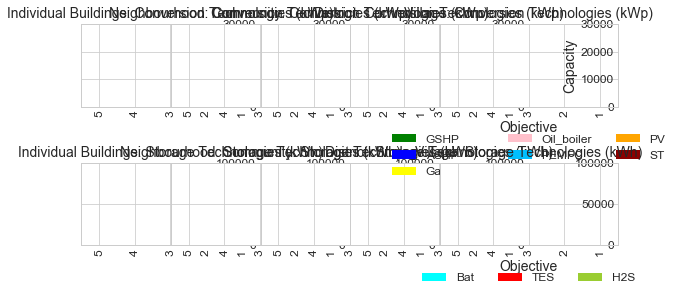

In [258]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()

ax = fig.add_subplot(2, 5, 1)
ax=ConvBuilding.plot(kind='Bar',stacked=True,legend=None,ax=ax,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('Individual Buildings: Conversion Technologies (kWp)',fontsize=14)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,30000)
ax.set_ylabel('Capacity',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #         ncol=3, fancybox=True, shadow=True,fontsize=12)

ax = fig.add_subplot(2, 5, 6)
ax=StorBuilding.plot(kind='Bar',stacked=True,ax=ax,legend=None,color=['cyan','red','yellowgreen'])
ax.set_title('Individual Buildings: Storage Technologies (kWh)',fontsize=14)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,100000)
#ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #       ncol=3, fancybox=True, shadow=True,fontsize=12)
    
ax = fig.add_subplot(2, 5, 2)
ax=ConvNeigh.plot(kind='Bar',stacked=True,legend=None,ax=ax,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('Neighbourhood: Conversion Technologies (kWp)',fontsize=14)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,30000)
ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #         ncol=3, fancybox=True, shadow=True,fontsize=12)

ax = fig.add_subplot(2, 5, 7)
ax=StorNeigh.plot(kind='Bar',stacked=True,ax=ax,legend=None,color=['cyan','red','yellowgreen'])
ax.set_title('Neighbourhood: Storage Technologies (kWh)',fontsize=14)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,100000)
#ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #       ncol=3, fancybox=True, shadow=True,fontsize=12)
    
ax = fig.add_subplot(2, 5, 3)
ax=ConvCom.plot(kind='Bar',stacked=True,legend=None,ax=ax,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('Community: Conversion Technologies (kWp)',fontsize=14)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,30000)
ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #         ncol=3, fancybox=True, shadow=True,fontsize=12)

ax = fig.add_subplot(2, 5, 8)
ax=StorCom.plot(kind='Bar',ax=ax,stacked=True,legend=None,color=['cyan','red','yellowgreen'])
ax.set_title('Community: Storage Technologies (kWh)',fontsize=14)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,100000)
#ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #       ncol=3, fancybox=True, shadow=True,fontsize=12)
ax = fig.add_subplot(2, 5, 4)
ax=ConvDistrict.plot(kind='Bar',stacked=True,legend=None,ax=ax,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('District: Conversion Technologies (kWp)',fontsize=14)
ax.set_ylim(0,30000)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #         ncol=3, fancybox=True, shadow=True,fontsize=12)

ax = fig.add_subplot(2, 5, 9)
ax=StorDistrict.plot(kind='Bar',stacked=True,ax=ax,legend=None,color=['cyan','red','yellowgreen'])
ax.set_title('District: Storage Technologies (kWh)',fontsize=14)
#ax.set_xlabel('Objective',fontsize=14)
#ax.set_ylabel('Capacity',fontsize=14)
ax.set_ylim(0,100000)
ax.tick_params(axis='both', which='major', labelsize=12)

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #       ncol=3, fancybox=True, shadow=True,fontsize=12)
ax = fig.add_subplot(2, 5, 5)
ax=ConvVillage.plot(kind='Bar',ax=ax,stacked=True,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('Village: Conversion Technologies (kWp)',fontsize=14)
ax.set_ylim(0,30000)
ax.set_xlabel('Objective',fontsize=14)
ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=True,fontsize=12)

ax = fig.add_subplot(2, 5, 10)
ax=StorVillage.plot(kind='Bar',stacked=True,ax=ax,legend=None,color=['cyan','red','yellowgreen'])
ax.set_title('Village: Storage Technologies (kWh)',fontsize=14)
ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,100000)
#ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
        ncol=3, fancybox=True, shadow=True,fontsize=12)
plt.tight_layout()
#plt.savefig(r'/Users/portia_murray/Dropbox/PhD/ICAE data/Sizes.png',bbox_inches='tight',dpi=300)

In [260]:
ConvBuilding

,GSHP,ASHP,Gas_boiler,Oil_boiler,PEMFC,PEMEC,PV,ST
1,0.000355856,0.00417684,1.4388,6.86738,0,0,0.89562,0
2,0.0715547,0.676113,0.906828,4.99957,0,0,0.999287,0
3,2.504,1.94877,1.26988,3.75486,0,0,1.01484,0.025
4,1.255,2.55353,2.4783,1.43212,0,0,0.965391,0
5,0.0448152,7.77283,0.126265,2.84e-05,0.112346,0.119112,2.55292,-2.25e-14


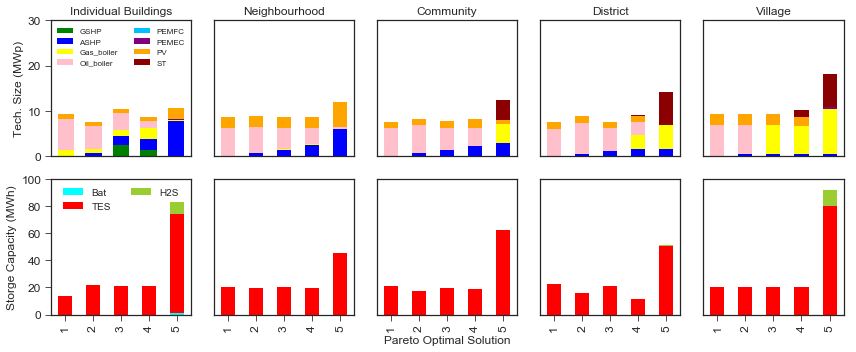

In [259]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(2, 5, 1)
ax=ConvBuilding.plot(kind='Bar',stacked=True,ax=ax,width=0.6,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('Individual Buildings',fontsize=12)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,30)
ax.set_ylabel('Tech. Size (MWp)',fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_visible(False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=2, fancybox=True, shadow=True,fontsize=8)
ax = fig.add_subplot(2, 5, 2)
ax=ConvNeigh.plot(kind='Bar',stacked=True,legend=None,ax=ax,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('Neighbourhood',fontsize=12)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,30)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #         ncol=3, fancybox=True, shadow=True,fontsize=12)
ax = fig.add_subplot(2, 5, 3)
ax=ConvCom.plot(kind='Bar',stacked=True,legend=None,ax=ax,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('Community',fontsize=12)
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,30)
ax.set_ylabel('Capacity',fontsize=14)
ax.xaxis.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #         ncol=3, fancybox=True, shadow=True,fontsize=12)
ax.yaxis.set_visible(False)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #       ncol=3, fancybox=True, shadow=True,fontsize=12)
ax = fig.add_subplot(2, 5, 4)
ax=ConvDistrict.plot(kind='Bar',stacked=True,legend=None,ax=ax,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('District',fontsize=12)
ax.set_ylim(0,30)
#ax.set_xlabel('Objective',fontsize=14)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_ylabel('Capacity',fontsize=14)
ax.xaxis.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #         ncol=3, fancybox=True, shadow=True,fontsize=12)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
 #       ncol=3, fancybox=True, shadow=True,fontsize=12)
ax = fig.add_subplot(2, 5, 5)
ax=ConvVillage.plot(kind='Bar',ax=ax,stacked=True,legend=None,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])
#ax.legend(loc=[1.01, 0.15])
ax.set_title('Village',fontsize=12)
ax.set_ylim(0,30)
ax.set_xlabel('Objective',fontsize=12)
ax.set_ylabel('Capacity',fontsize=12)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

ax = fig.add_subplot(2, 5, 6)
ax=StorBuilding.plot(kind='Bar',stacked=True,ax=ax,legend=None,color=['cyan','red','yellowgreen'])
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,100)
ax.set_ylabel('Storge Capacity (MWh)',fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
        ncol=2, fancybox=True, shadow=True,fontsize=10)

ax = fig.add_subplot(2, 5, 7)
ax=StorNeigh.plot(kind='Bar',stacked=True,ax=ax,legend=None,color=['cyan','red','yellowgreen'])
#ax.set_xlabel('Objective',fontsize=14)
ax.set_ylim(0,100)
ax.yaxis.set_visible(False)
#ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

ax = fig.add_subplot(2, 5, 8)
ax=StorCom.plot(kind='Bar',ax=ax,stacked=True,legend=None,color=['cyan','red','yellowgreen'])
ax.set_xlabel('Pareto Optimal Solution',fontsize=12)
ax.set_ylim(0,100)
#ax.set_ylabel('Capacity',fontsize=14)
ax.yaxis.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

ax = fig.add_subplot(2, 5, 9)
ax=StorDistrict.plot(kind='Bar',stacked=True,ax=ax,legend=None,color=['cyan','red','yellowgreen'])
#ax.set_xlabel('Objective',fontsize=14)
#ax.set_ylabel('Capacity',fontsize=14)
ax.set_ylim(0,100)
ax.yaxis.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

ax = fig.add_subplot(2, 5, 10)
ax=StorVillage.plot(kind='Bar',stacked=True,ax=ax,legend=None,color=['cyan','red','yellowgreen'])
ax.set_ylim(0,100)
ax.yaxis.set_visible(False)
#ax.set_ylabel('Capacity',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig(r'/Users/portia_murray/Dropbox/PhD/ICAE data/Sizes2.png',bbox_inches='tight',dpi=300)

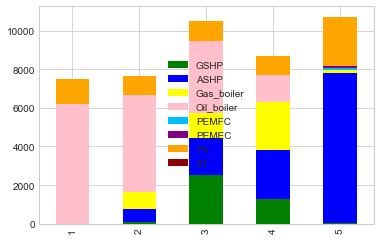

In [85]:
ConvBuilding.plot(kind='Bar',stacked=True,color=['green','blue','yellow','pink','deepskyblue','purple','orange','darkred'])

In [386]:
StorCom

,Bat,TES,H2S
1,0,21.2,0
2,0,17.754,0
3,0,19.837,0
4,0,19.252,0
5,0,62.516,0.002
